# Deep Learning Tutorial - Version 2

#### <font color="orange"> 이전과 달라진 점은 orange 색으로 표시했습니다.

<font color="orange"> 달라진 점

<font color="orange"> 1. one-hot encoding 했습니다.
    
<font color="orange"> 2. 함수 안에 모델 만드는 과정을 넣었습니다.
    
<font color="orange"> 3. flatten을 model 만드는 과정에서 진행해보았습니다.

아직 안 배운 개념들도 일부 나옵니다. 

7~8주차에 배운 뒤 적용하면 되며 그 이전에는 default 값으로 설정해도 무방하니 충분히 할 수 있습니다.

-------

## 1. data 업로드

1) MNIST란?  손으로 쓴 글자 데이터셋에서 숫자만 따로 뽑아낸 데이터셋입니다. 

2) 0부터 255 사이의 값을 가지는 흑백이미지, 28*28사이즈, 7만개의 이미지(train=6만,test=1만)로 구성되어있습니다.

3) 프로젝트 하실 때 data 업로드 방식은 이와 다릅니다. (향후 kaggle을 설명하면서 말씀 드리겠습니다.)

4) tensorflow 내의 함수로 data를 한 번에 불러올 수 있는 함수가 있습니다.

keras 공식문서: https://keras.io/datasets/#mnist-database-of-handwritten-digits 

tensorflow 공식문서: https://www.tensorflow.org/api_docs/python/tf/keras/datasets

그냥 소문자로 하겠습니다.

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

-------

## 2. data 확인

1) 데이터를 소개하기 위해 필요한 과정입니다.

2) 데이터가 잘 업로드 되었는지 확인하기 위해 필요한 과정입니다.

1


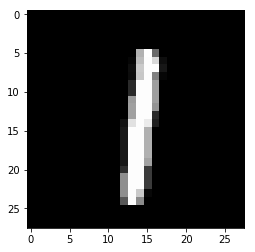

In [4]:
import matplotlib.pyplot as plt # 그래프 그리는 라이브러리로 이전 과제에서 자주 보셨을 것입니다.
%matplotlib inline 
# 이 부분이 있어야 셀 안에 그림을 그릴 수 있습니다.

index = 40 # index 설정에 따라 원하는 data를 골라서 그릴 수 있습니다.
img = x_train[index]
print(y_train[index])
plt.imshow(img,cmap='gray')

-------

## 3. data preprocessing

#### <font color="blue"> data를 딥러닝 모델 안에 넣고 잘 train 될 수 있게 하는 모든 행위를 의미합니다.

1) tensorflow는 기본적으로 'float32'를 사용해서 혹시 모를 error를 방지해 astype을 사용해서 형변환한다.

2) 이전에 잠시 언급된 normalization 또한 data pre-processing 과정에 속합니다.(test set까지 normalization 한다.) (7주차에 자세히 다룹니다.)

3) flatten: Dense layer는 vector (1D-array)만 input으로 받을 수 있어서 3D-array를 flatten하는 과정

4) one-hot encoding

#### <font color="orange"> one-hot encoding을 해본다.

In [5]:
## 1) 형변환 (astype)

x_train = x_train.astype('float32') # 32비트 실수형 / np.ndarray.astype은 numpy에 검색하면 형 변환 해주는 함수
x_test = x_test.astype('float32')

np.ndarray.astype: https://numpy.org/devdocs/reference/generated/numpy.ndarray.astype.html?highlight=astype#numpy.ndarray.astype

In [6]:
## 2) normalize

x_train /= 255
x_test /= 255

#### <font color="orange"> flatten을 미리하지 않고 모델 만드는 과정에서도 할 수 있습니다.

In [7]:
## 3) flatten
'''
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
'''

'\nx_train = x_train.reshape(60000, 28*28)\nx_test = x_test.reshape(10000, 28*28)\n'

In [8]:
# cf> one-hot encoding 전

y_train[0]

5

In [9]:
## 4) one-hot encoding


from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # convert class vector to binary class matirx
y_test = to_categorical(y_test, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### <font color="orange"> 5가 [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]으로 바뀝니다.

---------

## 4. 모델 만들기

### 1) tensorflow.keras.models.Sequential로 만든다.

1> 첫 번째 layer는 input_dim(feature 개수)을 설정해야 한다.

2> 마지막 layer는 우리가 진행하는 일이 regression, binary, multiclass이냐에 따라 다르게 설정한다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers

### <font color="orange"> 2) 좀 더 발전된 방식

#### <font color="orange"> 1> 이번엔 함수 안에 가둬서 만들어본다.
    
#### <font color="orange"> 2> flatten을 Sequential 내부에서 진행해본다.

In [ ]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(17, 'relu'))
    model.add(Dense(units=10, activation='softmax'))

    return model

<font color="orange"> compile도 내부에 넣어도 된다.

In [ ]:
model_f = create_model()

In [ ]:
model_f.summary()

------

## 5. 모델의 학습과정 설정

### 1) compile 메서드를 이용 -> 3가지가 중요 !

#### <font color="blue"> <shift + tab>
    
공식문서: https://keras.io/models/sequential/#compile

1> optimizer (다음 강의에서 등장하는 내용) (기본적인 건 **'sgd'** 이지만 일단 **'adam'** 으로 통일해서 잠시 사용하겠습니다.)

2> loss 설정 (tensorflow에서는 cost대신에 loss란 표현으로 통합하여 사용)

공식문서: https://keras.io/losses/

* tensorflow에서는 cost대신에 loss란 표현으로 통합하여 사용

* regression은 **'mse'** 를 binary classification에서는 **'binary_crossentropy'**

* multiclass classification에서는 

    * 1> one-hot encoding을 안 한 경우 **'sparse_categorical_crossentropy'**
    
    * 2> one-hot encoding을 한 경우 **'categorical_crossentropy'**

3> metrics (평가 지표입니다.) 

* 대표적으로 **'accuracy'** 가 있습니다. 

* 다른 metric에 대해서는 9주차에 배웁니다.

* -s 가 들어간 건 list 자료형으로 argument를 구성합니다.

#### <font color="orange"> one-hot encoding을 했으니 우리가 아는 **'categorical_crossentropy'**를 사용한다.

In [ ]:
model_f.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

---------

## 6. 모델 학습

### 1) fit 메서드를 이용

#### <font color="blue"> <shift + tab> 
    
공식문서: https://keras.io/models/sequential/#fit
    
1> x: feature = input
    
2> y: label
    
3> epochs (7주차) (이전에 잠시 언급: 전체 training data를 train 하는 횟수)
    
4> verbose: train할 때 표시되는 bar (숫자를 추가할수록 기능이 추가되지만 보통 1을 사용
    
5> validation_split
    
* 여기서 data split을 할 수 있다.
    
* x로 들어가는 data 중 validation set에 할당할 비율을 할당한다. (0~1사이의 float)

6> validation_data

* 미리 data를 잘라 두었다면 'validation_data = (x_val, y_val)' 식으로 할당해도 된다.
    
나머지는 크게 중요하지 않습니다. (향후 등장할 개념: batch_size, callbacks)

### <font color="orange"> 2) 미리 validation을 자르고서 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split

#### <font color="orange"> 1> train에 5/6을 할당한다.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 5/6)

#### <font color="orange"> 2> fit의 argument인 validataion_data를 사용한다.

In [ ]:
history = model_f.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

### 2) history

1> model.fit의 return 값

2> train 과정에서 일어나는 현상들을 기록

In [ ]:
vars(history) # vars: python의 내장함수 / 해당 객체의 모듈, 클래스, 인스턴스의 값을 넘긴다.

### <font color="orange"> cf> add 메서드의 단점 (stack) 극복

#### <font color="orange"> 단 3줄로 stack 없이 새로 시작 가능

In [ ]:
model_f = create_model()
model_f.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model_f.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=5)

-----------

## 7. 학습과정 graph

### 1) loss

1> 위에서 학습한 내용을 토대로 train/val 의 loss값을 시각적으로 확인 하는 단계입니다.

2> history.history = {'loss': ... , 'accuracy':... , 'val_loss': ... , 'val_accuracy': ...}이 각각 담겨있다.

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()       ## plt.legend - 동시에 여러개의 그래프를 그릴 때, 그래프마다 라벨을 달고 이 라벨명을 출력하는 기능을 합니다.

plt.show()

### 2) accuracy

1> 위에서 학습한 내용을 토대로 train/val 의 accuracy값을 시각적으로 확인 하는 단계입니다.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---------------

## 8. 최종 test

### 1) evaluate 메서드를 이용

0> test set으로 마지막 검증하는 과정

#### <font color="blue"> <shift + tab> 
    
공식문서: https://keras.io/models/sequential/#evaluate

1> x
    
2> y
    
3> verbose

In [ ]:
loss_and_metrics = model_f.evaluate(x_test, y_test, verbose=0) # return 값은 loss와 accuracy를 가지는 리스트

loss_and_metrics

In [ ]:
print('\n')
print('test_loss: ' + str(loss_and_metrics[0]))
print('test_accuracy: ' + str(loss_and_metrics[1]*100) + '%')

------------

## <font color="orange"> cf> predict

<font color="orange"> 1> y와의 비교 없이 forward propagation만 하는 것

<font color="orange"> 2> x만 넣는다.

<font color="orange"> 3> 실제 device에서 진행 (여러분 project에서는 사용할 일이 적습니다.)

In [ ]:
plt.imshow(x_test[0], cmap='gray')

In [ ]:
model_f.predict(x_test[0])

In [ ]:
import numpy as np

In [ ]:
x_test[0].shape

In [ ]:
np.expand_dims(x_test[0],axis=0).shape

In [ ]:
a = model_f.predict(np.expand_dims(x_test[0],axis=0))
a

In [ ]:
np.sum(a)

In [ ]:
np.max(a)

In [ ]:
np.argmax(a) # 최대값을 같는 곳의 index를 출력